# openCV 스터디 1주차 - 에지 검출(로버츠, 프리윗)
----  
<br>

## 에지
사진, 영상에서 밝기가 ***급격하게*** 변하는 부분이다.  
**에지 검출(Edge Detection)** 은 에지에 해당하는 화소를 찾는 과정이다.   
<br>

## 검출 방법
에지는 명암의 변화가 큰 지점이므로, ***밝기 변화율*** 을 이용해 검출한다.  
이 변화율을 검출 방법이 **1차 미분** 이다.  
<br>
<img src="./std_img/gradient_1.png" width=50% height=50% />
<br>  
일반적으로는 미분을 직접 하지 않고, 공식을 토대로 에지를 검출합니다.

In [1]:
import cv2 # openCV
import numpy as np # mask 구현
from matplotlib import pyplot as plt # 이미지 표시

에지 검출은 **그레이 스케일** 에서 진행됩니다.

In [2]:
img = cv2.imread('./img/test_castle.jpg') # 이미지 불러오기
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 이미지 흑백 처리

## 마스크 모양
----
<br>

### 로버츠(Robets) 추출

<table>
<tr><th>Gx</th><th>Gy</th></tr>
<tr><td>
<table>
<tr>
<td>-1</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
</table>
</td><td>
<table>
<tr>
<td>0</td>
<td>0</td>
<td>-1</td>
</tr>
<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
</table>
</td></tr> </table>

* 다른 마스크에 비해 **매우 빠른 계산 속도를** 냄
* 주변과 관계없이 **경계가 확실한 에지를** 추출
* 다른 마스크보다 크기가 작아 돌출한 화소값을 평균화 할 수 없는 관계로 **잡음 해결이 불가능.**

In [3]:
roberts_x = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 0]])
roberts_y = np.array([[0, 0, -1], [0, 1, 0], [0, 0, 0]])

### 프리윗(Prewitt) 추출

<table>
<tr><th>Gx</th><th>Gy</th></tr>
<tr><td>
<table>
<tr>
<td>-1</td>
<td>0</td>
<td>1</td>
</tr>
<tr>
<td>-1</td>
<td>0</td>
<td>1</td>
</tr>
<tr>
<td>-1</td>
<td>0</td>
<td>1</td>
</tr>
</table>
</td><td>
<table>
<tr>
<td>-1</td>
<td>-1</td>
<td>-1</td>
</tr>
<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>
</table>
</td></tr> </table>

* 소밸 마스크와 결과가 비슷
* 계산 시간이 소벨과 로버츠 중간
* 소벨 마스크에 비해 밝기 변화에 둔감해서 에지가 덜 부각됨
* 대각선 방향의 에지보다 수직/수평 방향 에지에 더 민감함

In [4]:
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

In [5]:
# cv2.convertScaleAbs
# 계산 결과를 절댓값화/절대화 시킴
roberts_x = cv2.convertScaleAbs(cv2.filter2D(gray, -1, roberts_x))
roberts_y = cv2.convertScaleAbs(cv2.filter2D(gray, -1, roberts_y))
prewitt_x = cv2.convertScaleAbs(cv2.filter2D(gray, -1, prewitt_x))
prewitt_y = cv2.convertScaleAbs(cv2.filter2D(gray, -1, prewitt_y))

roberts_data = [gray, roberts_x, roberts_y, roberts_x + roberts_y]
prewitt_data = [gray, prewitt_x, prewitt_y, prewitt_x + prewitt_y]

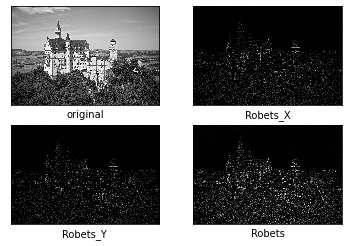

In [6]:
xlabels = ["original", "Robets_X", "Robets_Y", "Robets"]
i = 1
fig = plt.figure()
for r in roberts_data:
    ax = fig.add_subplot(2, 2, i)
    ax.imshow(r, cmap='gray', interpolation='none', vmin=0, vmax=255)
    cv2.imwrite('img/output/roberts/' + xlabels[i - 1] + '.jpg', r)
    ax.set_xlabel(xlabels[i - 1])
    ax.set_xticks([]), ax.set_yticks([])
    i += 1

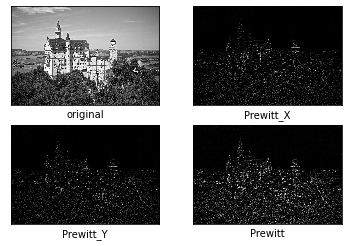

In [7]:
xlabels = ["original", "Prewitt_X", "Prewitt_Y", "Prewitt"]
i = 1
fig = plt.figure()
for r in roberts_data:
    ax = fig.add_subplot(2, 2, i)
    ax.imshow(r, cmap='gray', interpolation='none', vmin=0, vmax=255)
    cv2.imwrite('img/output/prewitt/' + xlabels[i - 1] + '.jpg', r)
    ax.set_xlabel(xlabels[i - 1])
    ax.set_xticks([]), ax.set_yticks([])
    i += 1